In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [272]:
data = pd.read_csv("iris.data", header=None)

In [273]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [274]:
data[4] = [np.argmax(x) for x in np.array(pd.get_dummies(data[4]))]

In [275]:
data_x = np.array(data.drop([4], axis=1))
data_y = np.array(data.take([4], axis=1)).reshape((len(data[4]), ))

In [276]:
data_x = StandardScaler().fit(data_x).transform(data_x)

In [277]:
print(np.shape(data_x), np.shape(data_y))

(150, 4) (150,)


In [278]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.9, random_state=42)

In [279]:
model = LogisticRegression(multi_class="auto", solver="lbfgs", n_jobs=-1)

In [280]:
print(np.shape(train_x), np.shape(train_y))

(15, 4) (15,)


In [281]:
model.fit(train_x, train_y)

LogisticRegression(n_jobs=-1)

In [282]:
predict = model.predict(test_x)

In [283]:
matrix = confusion_matrix(test_y, predict)
matrix

array([[46,  2,  0],
       [ 0, 34, 10],
       [ 0,  1, 42]], dtype=int64)

In [284]:
positive = [matrix[i][i] for i in range(len(matrix))]
positive

[46, 34, 42]

In [285]:
false_pos = [np.sum(np.transpose(matrix)[i])-matrix[i][i] for i in range(len(matrix))]
false_pos

[0, 3, 10]

In [286]:
false_negative = [np.sum(matrix[i])-matrix[i][i] for i in range(len(matrix))]
false_negative

[2, 10, 1]

In [287]:
total = np.sum(matrix)
total

135

In [288]:
accuracy = np.sum(positive) / total
accuracy

0.9037037037037037

In [289]:
precisions = [positive[i] / (false_pos[i]+positive[i]) for i in range(len(matrix))]
precisions

[1.0, 0.918918918918919, 0.8076923076923077]

In [290]:
recall = [positive[i] / (positive[i]+false_negative[i]) for i in range(len(matrix))]
recall

[0.9583333333333334, 0.7727272727272727, 0.9767441860465116]

In [291]:
f1 =  [2 * (recall[i]*precisions[i]) / (recall[i]+precisions[i]) for i in range(len(matrix))]
f1

[0.9787234042553191, 0.8395061728395061, 0.8842105263157894]

In [306]:
np.array(model.predict_proba(test_x).transpose()[0]).shape

(135,)

In [320]:
np.max(test_y)

2

(3, 8)


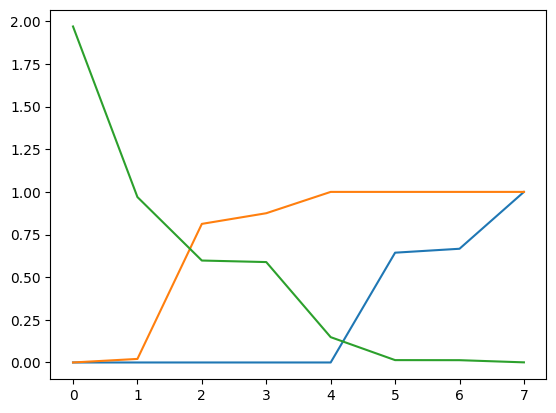

In [338]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# def to_binary(x):
#     res = np.zeros((3,))
#     res[x] = 1
#     return res
# binary_y = np.transpose([to_binary(x) for x in test_y])
# print(np.shape(binary_y))
curve = roc_curve(test_y, model.predict_proba(test_x).transpose()[0], pos_label=0)
print(np.array(curve).shape)
plt.plot(np.transpose(curve))

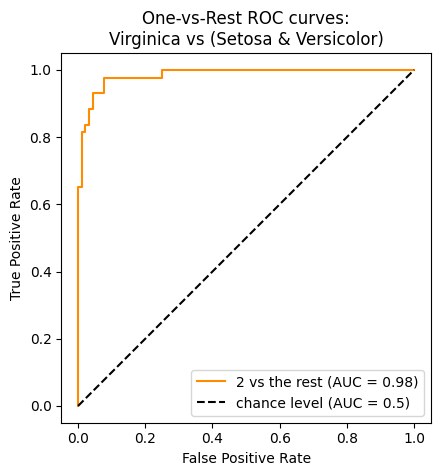

In [337]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
y_onehot_test.shape  # (n_samples, n_classes)
# print(y_onehot_test.shape,y_onehot_test)

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    model.predict_proba(test_x)[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()
